# Check EMA Compliance

In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

today = date.today() 
week_ago = today - dt.timedelta(days=7)
today = today.strftime("%d%m%Y")
week_ago = week_ago.strftime("%Y-%m-%d")

datapath = f"/Users/leonahammelrath/FU_Psychoinformatik/Github/tiki_code/data/export_tiki_{today}"
filepath = "/Users/leonahammelrath/FU_Psychoinformatik/Github/tiki_code/data/"


Bad key text.latex.preview in file /Users/leonahammelrath/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/leonahammelrath/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/leonahammelrath/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       

In [2]:
session = pd.read_csv(datapath + "/questionnaireSession.csv")

In [3]:
session["user"] = session["user"].str[:4]

In [4]:
session.rename(columns = {"completedAt": "quest_complete", "createdAt": "quest_create", "expirationTimestamp": "quest_expir"}, inplace=True)
session["quest_create"] = (pd.to_datetime(session["quest_create"],unit='ms'))
session["quest_complete"] = (pd.to_datetime(session["quest_complete"],unit='ms'))
session["quest_expir"] = (pd.to_datetime(session["quest_expir"],unit='ms'))

In [5]:
session.head()

,id,user,study,questionnaire,sessionRun,quest_expir,quest_create,quest_complete
0,6954,APbN,25,56,0,2023-04-27 08:15:00,2023-04-27 08:06:41.477,2023-04-27 08:07:59.942000128
1,6963,APbN,25,68,0,2023-04-27 10:15:00,2023-04-27 10:03:35.644,2023-04-27 10:04:27.840999936
2,7004,APbN,25,76,0,2023-04-28 12:15:00,2023-04-28 12:00:38.257,2023-04-28 12:02:08.348999936
3,7010,APbN,25,84,0,2023-04-28 14:15:00,2023-04-28 14:01:05.941,2023-04-28 14:03:22.896999936
4,7012,APbN,25,90,0,2023-04-28 15:15:00,2023-04-28 15:01:38.187,2023-04-28 15:01:48.676000000


In [6]:
quest = pd.read_csv(datapath + "/questionnaires.csv")

In [7]:
quest = quest[["id", "name", "description"]]
quest.rename(columns = {"id": "questionnaire", "description": "quest_text"}, inplace=True)

In [8]:
session = pd.merge(session, quest, on="questionnaire")

In [9]:
session.head()

,id,user,study,questionnaire,sessionRun,quest_expir,quest_create,quest_complete,name,quest_text
0,6954,APbN,25,56,0,2023-04-27 08:15:00,2023-04-27 08:06:41.477,2023-04-27 08:07:59.942000128,TIKI_1A_E1,Willkommen zu Ihrer ersten Erhebungsphase!
1,7566,rSOE,25,56,0,2023-05-16 08:30:00,2023-05-16 08:05:28.492,2023-05-16 08:06:19.697999872,TIKI_1A_E1,Willkommen zu Ihrer ersten Erhebungsphase!
2,7596,9xNR,25,56,0,2023-05-17 08:30:00,2023-05-17 08:12:13.084,NaT,TIKI_1A_E1,Willkommen zu Ihrer ersten Erhebungsphase!
3,8011,N3CY,25,56,0,2023-06-01 08:28:00,2023-06-01 08:06:34.021,2023-06-01 08:19:51.908000000,TIKI_1A_E1,Willkommen zu Ihrer ersten Erhebungsphase!
4,8043,s4i0,25,56,0,2023-06-03 08:28:00,2023-06-03 08:02:16.210,2023-06-03 08:04:58.423000064,TIKI_1A_E1,Willkommen zu Ihrer ersten Erhebungsphase!


### Combine with EMA ID 

In [10]:
df_sess = session[["user", "questionnaire", "sessionRun", "quest_create", "quest_complete", "study"]]
df_sess = df_sess.rename(columns = {"user":"customer"})

In [11]:
df_sess1 = df_sess.loc[df_sess.study.isin([24,25])]
sess_count1 = df_sess1.dropna(subset=["quest_complete"]).groupby("customer")["quest_complete"].size()\
.reset_index()
sess_count1 = sess_count1.rename(columns = {"quest_complete":"nquest_EMA1"})

In [12]:
df_sess2 = df_sess.loc[df_sess.study.isin([33,34])]
sess_count2 = df_sess2.dropna(subset=["quest_complete"]).groupby("customer")["quest_complete"].size()\
.reset_index()
sess_count2 = sess_count2.rename(columns = {"quest_complete":"nquest_EMA2"})

In [13]:
df_active = pd.read_csv(filepath +"/active_participants.csv")

In [14]:
df_active.rename(columns = {"Pseudonym ": "customer", "EMA ID": "ema_id", "Ende EMA Baseline": "end_ema", "Status": "status",
                            "Start EMA Baseline": "start_ema", "Studienversion":"study_version", "FOR_ID":"for_id"}, inplace=True)

df_active = df_active[["customer", "ema_id", "end_ema", "start_ema", "study_version", "for_id", "status"]]

In [15]:
df_active["customer"] = df_active.customer.str[:4]

In [16]:
df_complete = pd.merge(df_active, sess_count1, on="customer")
df_complete = pd.merge(df_complete, sess_count2, on="customer", how="outer")
df_complete.to_csv(f"ema_compliance_{today}.csv")

In [17]:
df_finish = df_complete[df_complete.status == "Abgeschlossen"]

In [18]:
df_finish

,customer,ema_id,end_ema,start_ema,study_version,for_id,status,nquest_EMA1,nquest_EMA2
4,5qL5,EMA4001,26.06.2023,12.06.2023,Kurz,FOR14903,Abgeschlossen,33.0,NaN
5,L8UG,EMA1006,29.06.2023,15.06.2023,Kurz,FOR11010,Abgeschlossen,24.0,NaN
8,3ZqH,EMA3002,04.07.2023,20.06.2023,Kurz,FOR13901,Abgeschlossen,67.0,NaN
14,3s90,EMA3004,11.07.2023,27.06.2023,Kurz,FOR13001,Abgeschlossen,21.0,NaN
16,f7RF,EMA4005,13.07.2023,29.06.2023,Kurz,FOR14006,Abgeschlossen,76.0,NaN
21,bVec,EMA1007,20.07.2023,06.07.2023,Kurz,FOR11018,Abgeschlossen,91.0,NaN
26,Emob,EMA1011,25.07.2023,11.07.2023,Kurz,FOR11020,Abgeschlossen,49.0,NaN
28,uN1K,EMA4009,26.07.2023,12.07.2023,Kurz (Wechsel/Abbruch),FOR14011,Abgeschlossen,23.0,NaN
30,bNPw,EMA1013,02.08.2023,19.07.2023,Kurz,FOR11023,Abgeschlossen,25.0,NaN
34,GuiZ,EMA2005,08.08.2023,25.07.2023,Kurz (Wechsel/Abbruch),FOR12002,Abgeschlossen,25.0,NaN


In [19]:
df_finish.nquest_EMA1.describe()

count    32.000000
mean     51.687500
std      25.867451
min       9.000000
25%      25.000000
50%      50.500000
75%      69.250000
max      98.000000
Name: nquest_EMA1, dtype: float64

In [20]:
df_finish_long = df_complete[df_complete.status.isin(["Post_Erhebung_1","Post_Erhebung_2", "Erhebung_2_aktiv", "Abgeschlossen"])]

In [21]:
(df_finish_long.groupby("study_version")["nquest_EMA1"].mean()/112)*100

study_version
Kurz                      46.858466
Kurz (Wechsel/Abbruch)    42.321429
Lang                      68.205575
Lang (Wechsel)            61.532738
Name: nquest_EMA1, dtype: float64

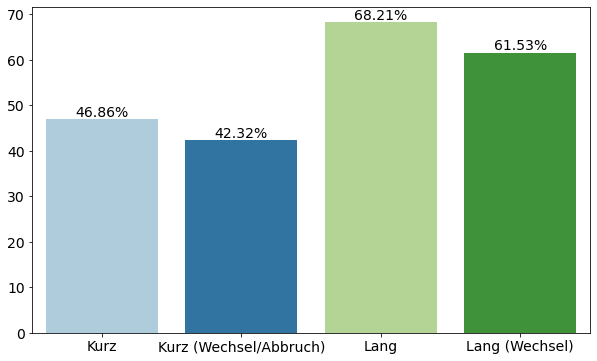

In [22]:
# Assuming df_finish_long is your DataFrame
# Group by "study_version" and calculate the mean of "nquest_EMA1" as a percentage
grouped_data = (df_finish_long.groupby("study_version")["nquest_EMA1"].mean() / 112) * 100

# Reset the index to make "study_version" a column
grouped_data = grouped_data.reset_index()


# Create a barplot or pointplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(data=grouped_data, x="study_version", y="nquest_EMA1", palette="Paired")

for index, row in grouped_data.iterrows():
    plt.text(index, row["nquest_EMA1"], f"{row['nquest_EMA1']:.2f}%", ha="center", va="bottom", fontsize=14)

# Show the plot
plt.xticks(fontsize=14)  # Increase the fontsize of x-axis tick labels
plt.yticks(fontsize=14)  # Increase the fontsize of y-axis tick labels

plt.ylabel('')
plt.xlabel('')

# Show the plot
#plt.savefig("ema_grouped.png", dpi=300, format='png', bbox_inches='tight')

In [24]:
df_finish_long.groupby("study_version")["nquest_EMA2"].count()

study_version
Kurz                      0
Kurz (Wechsel/Abbruch)    0
Lang                      2
Lang (Wechsel)            1
Name: nquest_EMA2, dtype: int64